In [3]:
# Import the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# import the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("The cancer data keys are: \n {}".format(cancer.keys()))

The cancer data keys are: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [18]:
# Print the shape of the data
print("The shape of the data is :\n {}".format(cancer.data.shape))

The shape of the data is :
 (569, 30)


In [46]:
# Print the shape of the target
cancer.target.shape

(569,)

In [43]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Split the Data into Train and Test Data

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [52]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

In [61]:
# Develop a list of accuracies 

training_accuracy = []
test_accuracy = []

neighbour_settings = range(1,11)

for n in neighbour_settings:
    knn = KNeighborsClassifier(n_neighbors = n)
    
    # Train the data
    knn.fit(X_train, y_train)
    
    # Record Training accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    
    # Record test accurcacy
    test_accuracy.append(knn.score(X_test, y_test))

In [62]:
print(training_accuracy)

[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]


In [63]:
print(test_accuracy)

[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


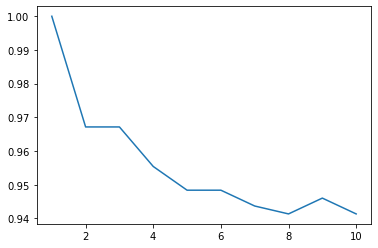

In [64]:
plt.plot(neighbour_settings, training_accuracy)
plt.show()

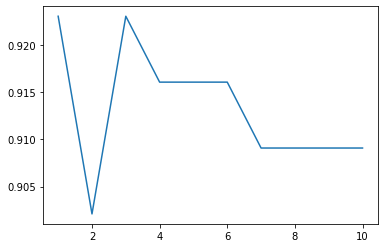

In [65]:
plt.plot(neighbour_settings, test_accuracy)
plt.show()